<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OSI_SAF_wind_file_structure.ipynb" target="_blank"><< Exploring OSI SAF wind product structure</a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-wind/HEAD?urlpath=%2Ftree%2F1_OSI_SAF_wind_introductory%2F1_3_OSI_SAF_mapping_wind.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF wind: Introductory</h3></div>

# 2.1b Advanced Mapping : Case study of typhoon [NOM]

### Data used

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
| HY-2D 25 km wind vectors |  | <a href="https://osi-saf.eumetsat.int/products/osi-116-a" target="_blank">link</a> | OSI-116-a | 

### Learning outcomes

At the end of this notebook you will know;
* Map winds products using cartopy
* Retrive an satellite image from eumetview
* Overlay IR image and wind vector

<div class="alert alert-info" role="alert">
    
## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Setting Parameters](#section1)
 1. [Mapping a wind dataset with cartopy](#section2)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import os                          # a library that allows us access to basic operating system commands
import xarray as xr                # a library that supports the use of multi-dimensional arrays in Python
import matplotlib as mpl           # a library for visualization
import matplotlib.pyplot as plt    # a library that supports plotting
import matplotlib.cm as mpl_cm     # a part of the plotting library that provides colour maps
import cartopy.crs as ccrs         # a mapping library that supports reprojection
import cartopy.feature as cfeature # a part of the mapping library that provides features such as coastlines
import cmocean                     # colormaps for ocean products
import cmcrameri                   # scientific colormaps for data visualisation
import numpy as np                 # a library that supports array manipulation
import warnings                    # a library that controls python warnings
import json                        # a library that allow us to work with json data
from owslib.wms import WebMapService 
from owslib.util import Authentication
import requests                    # a library that allow us to work with HTTP
import urllib.request              # a library that allow us to work with URL

from authorisation_functions import authorisation_functions as auth
warnings.filterwarnings('ignore')

##
<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting login information
[Back to top](#TOC-TOP)

</div>
The access to eumetview data follows the same processus as the access to eumetsat data store.

See the processus at <a href="./1_1c_OSI_SAF_SST_data_access_Eumetsat_data_store.ipynb" target="_blank"> 1_1c_OSI_SAF_SST_data_access_Eumetsat_data_store</a>.

In [2]:
# load credentials
with open(os.path.join(os.path.expanduser("~"),'.eumdac_credentials')) as json_file:
    credentials = json.load(json_file)
    token = auth.generate_token(consumer_key=credentials['consumer_key'], consumer_secret=credentials['consumer_secret'])
    print(f"Access token retrieved '{token}'")


Access token retrieved '83dd6425-2c32-3450-a36d-accc13953488'


##
<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Setting Parameters
[Back to top](#TOC-TOP)

</div>

Select the direcory where the data of HY-2B 25 km wind is available

In [3]:
directory = 'typhoon/'

Select geographical area for zooming map

In [4]:
# Set area
lon_min = 120
lon_max = 146
lat_min = 4
lat_max = 23

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>. 

In [5]:
cmap = mpl_cm.get_cmap('RdYlBu_r')

We also recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> .

In [6]:
# another choice could be
#cmap = cmocean.cm.speed

##
<div class="alert alert-info" role="alert">

## <a id='section3'></a>2. Background : IR image 
[Back to top](#TOC-TOP)

</div>
The objective of this section is to retrive a Infrared image of the typhon [NOM] from the Eumetsat tool *Emetview*.

In an infrared image, clouds can be visualize and so, it is possible to see the wrap-around cloud of the typhoon.

Set the url link of eumetview

In [7]:
service_url = 'https://view.eumetsat.int/geoserver/ows?'

Set the image collection 

In [8]:
collection = "mumi:worldcloudmap_ir108"

Set the geographical area and the date

In [9]:
region1 = "4,120,23,146"
date = "2023-06-8T19:45:50.000Z"

Research the image

In [10]:
wms = WebMapService(service_url, auth=Authentication(verify=False))

# set the size of the image
xval = 800
region = [int(x) for x in region1.split(",")]
ratio = (region[3] - region[1])/ (region[2] - region[0])

format_option = 'image/jpeg'
payload = {'service' : 'WMS',
'access_token' : token,
'request' : 'GetMap',
'version' : '1.3.0',
'layers' : collection + ",backgrounds:ne_10m_coastline", # We display the layer together with the coastlines layer
'format' : format_option,
'crs' : 'EPSG:4326',
'bbox' : region1,
'width' : int(xval),  
'height' : int(xval/ratio), 
'time': date }   
req = requests.get(service_url, params=payload)

Plot the IR image 

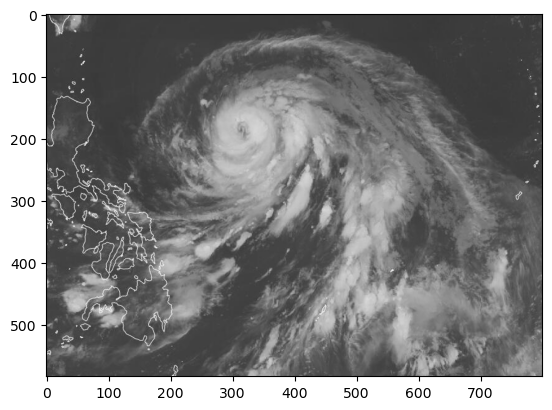

In [11]:
file = urllib.request.urlopen(req.url)
im_IR = plt.imread(file, 0)
plt.imshow(im_IR)

##
<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Wind vector
[Back to top](#TOC-TOP)

</div>
The objective of this section is to plot the wind vectors of the typhon [NOM].

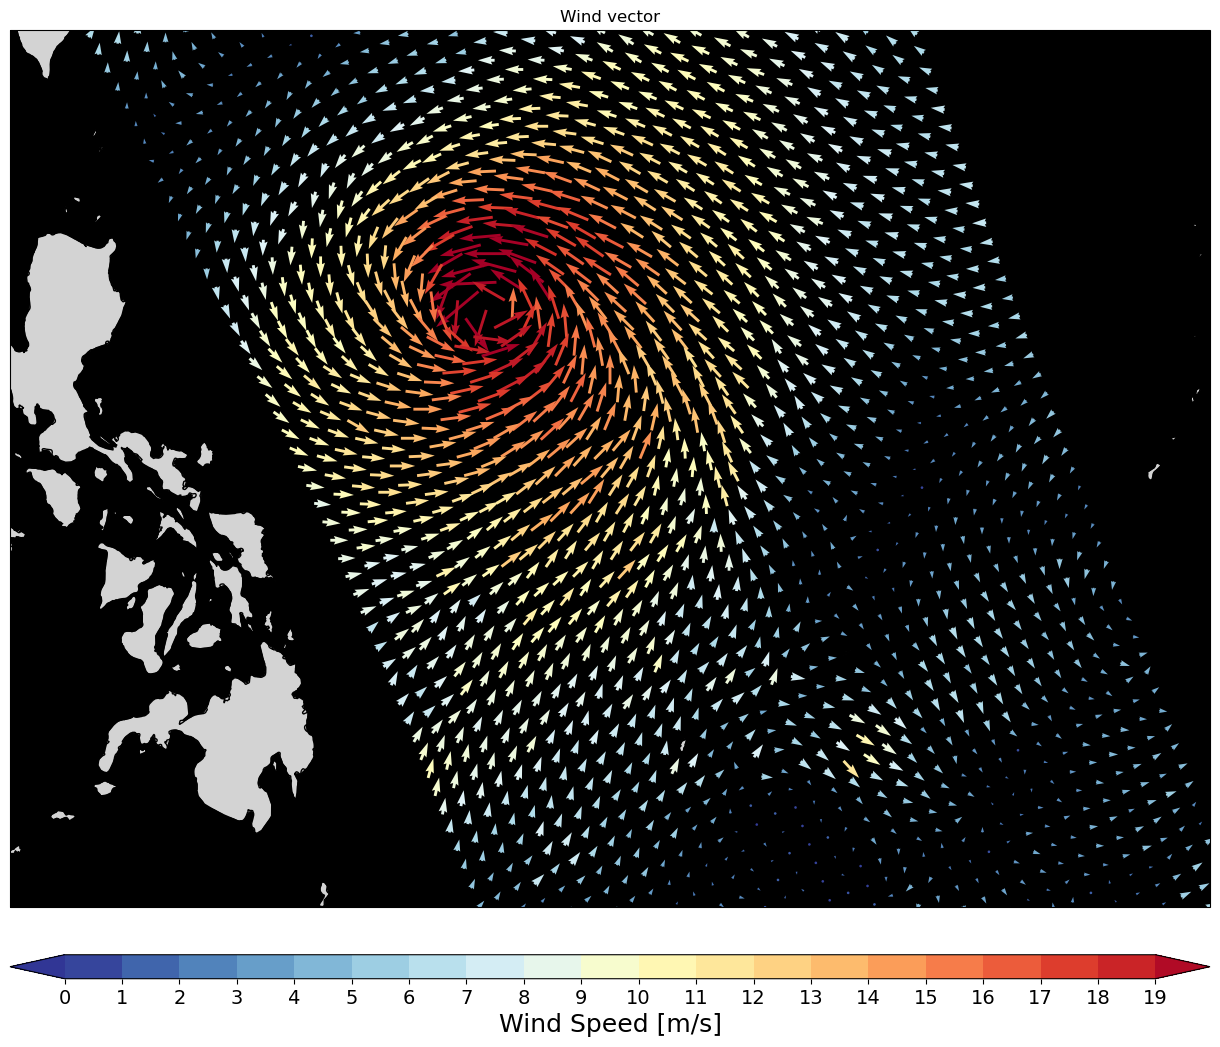

In [12]:
fig = plt.figure(figsize=(16,12))

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection=ccrs.PlateCarree()

# define plot carateristics
ax = plt.axes([0.1,0.1,0.75,0.85], projection=output_projection)
ax.set_extent([lon_min,lon_max,lat_min,lat_max], crs=data_projection)
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black') # Change color of ocean
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey')  # Change color of landl 
ax.coastlines()    # Add coastline
ax.coastlines('10m')
#Add title
plt.title("Wind vector")

# open and plot osi saf netcdf wind files
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        nc.close()
        
        wind_speed = np.ma.masked_where(lon<1, wind_speed)
        
        # plotting wind barbs in cartopy requires u and v and components.
        u = np.full_like(lat,0)
        v = np.full_like(lat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 2  #Select some data
        
        # plotting wind direction and wind speed
        im = ax.quiver(lon[::stride,::stride], lat[::stride,::stride], u[::stride,::stride], 
                v[::stride,::stride], wind_speed[::stride,::stride], cmap=cmap, transform=data_projection, 
                scale = 600)
        
        im.set_clim(0,20)
        
# Adding a colorbar
axc = fig.add_axes((0.1,0.10,0.75,0.02))
bounds = range(0,20)
cb = plt.colorbar(im, orientation='horizontal', extend='both', cax=axc, ticks=bounds, boundaries=bounds)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

##
<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Overlay
[Back to top](#TOC-TOP)

</div>
The obejctive of this final section is to overlay the IR image with the wind vetor.

In [13]:
fig = plt.figure(figsize=(16,12))

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection=ccrs.PlateCarree()

<Figure size 1600x1200 with 0 Axes>

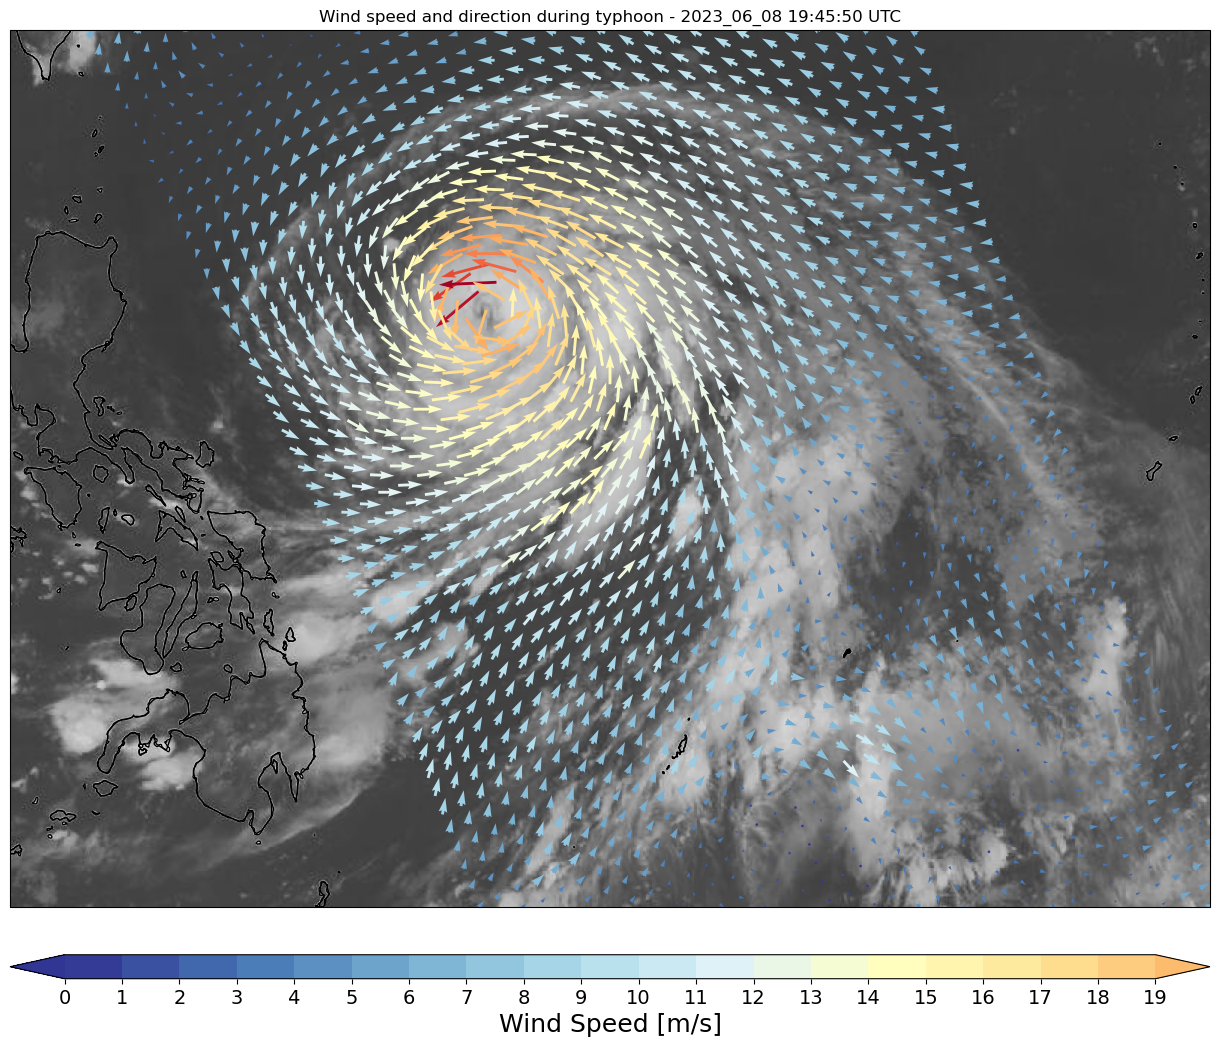

In [14]:
fig = plt.figure(figsize=(16,12))

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection=ccrs.PlateCarree()

# define plot carateristics
ax = plt.axes([0.1,0.1,0.75,0.85], projection=output_projection)
ax.set_extent([lon_min,lon_max,lat_min,lat_max], crs=data_projection)
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black') # Change color of ocean
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey')  # Change color of land
ax.coastlines()    # Add coastline
ax.coastlines('10m')

#Add title
plt.title("Wind speed and direction during typhoon - 2023_06_08 19:45:50 UTC")

#Add IR backgroud image
img_extent = (lon_min, lon_max, lat_min, lat_max)
ax.imshow(im_IR, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())

# open and plot osi saf netcdf wind files
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        nc.close()
        
        wind_speed = np.ma.masked_where(lon<1, wind_speed)
        
        # plotting wind barbs in cartopy requires u and v and components.
        u = np.full_like(lat,0)
        v = np.full_like(lat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 2  #Select some data
        
        # plotting wind direction and wind speed
        im = ax.quiver(lon[::stride,::stride], lat[::stride,::stride], u[::stride,::stride], 
                v[::stride,::stride], wind_speed[::stride,::stride], cmap=cmap, transform=data_projection, 
                scale = 600)
        
# Adding a colorbar
axc = fig.add_axes((0.1,0.10,0.75,0.02))
bounds = range(0,20)
cb = plt.colorbar(im, orientation='horizontal', extend='both', cax=axc, ticks=bounds, boundaries=bounds)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OSI_SAF_wind_file_structure.ipynb" target="_blank"><< Exploring OSI SAF wind product structure</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>